In [28]:
!pip install numpy 
!pip install opencv-python
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

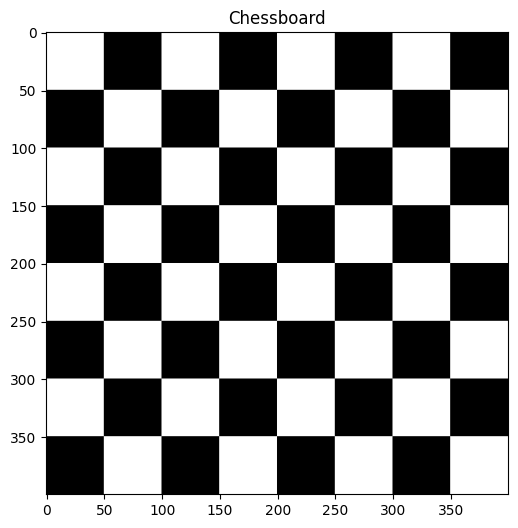

In [30]:
#1
import numpy as np
import matplotlib.pyplot as plt

square_size = 50
tile = np.zeros((2 * square_size, 2 * square_size), dtype=np.uint8)
tile[:square_size, :square_size] = 255  # top-left white square
tile[square_size:, square_size:] = 255  # bottom-right white square
chessboard = np.tile(tile, (4, 4))

plt.figure(figsize=(6, 6))
plt.imshow(chessboard, cmap='gray')
plt.title('Chessboard')
plt.show()


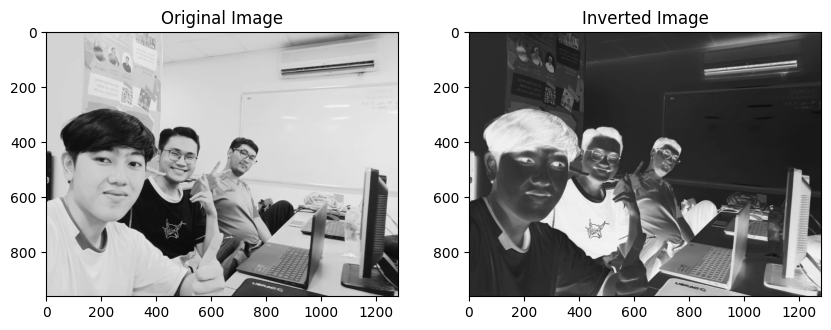

In [31]:
#2
image_path = r'xla.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
inverted_image = 255 - image

cv2.imwrite(r'xla_1.jpg', inverted_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap='gray')
plt.title('Inverted Image')
plt.show()

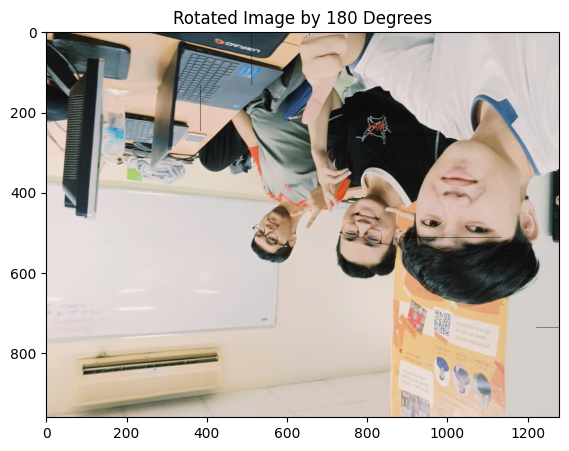

In [32]:
#3
image_path = r'xla.jpg'
image = cv2.imread(image_path)

(h, w) = image.shape[:2]
angle = 180
angle_rad = math.radians(angle)
cx, cy = w // 2, h // 2
rotated_image = np.zeros_like(image)
for y in range(h):
    for x in range(w):
        new_x = int((x - cx) * math.cos(angle_rad) - (y - cy) * math.sin(angle_rad) + cx)
        new_y = int((x - cx) * math.sin(angle_rad) + (y - cy) * math.cos(angle_rad) + cy)
        if 0 <= new_x < w and 0 <= new_y < h:
            rotated_image[new_y, new_x] = image[y, x]

cv2.imwrite(r'xla3.jpg', rotated_image)
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image by 180 Degrees')
plt.show()


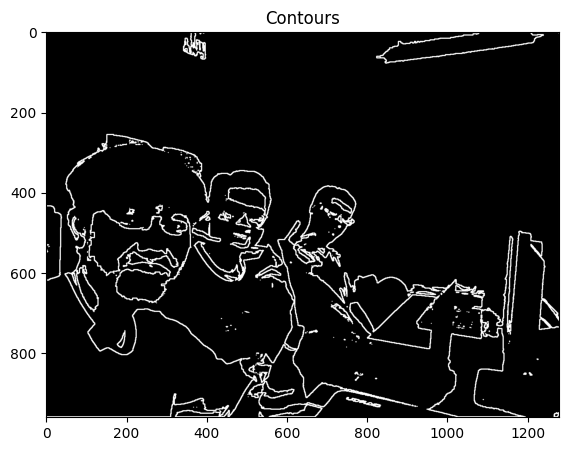

In [33]:
#4
image_path = r'xla.jpg'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 185, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = np.zeros_like(image)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

cv2.imwrite(r'xla4.jpg', contour_image)
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()


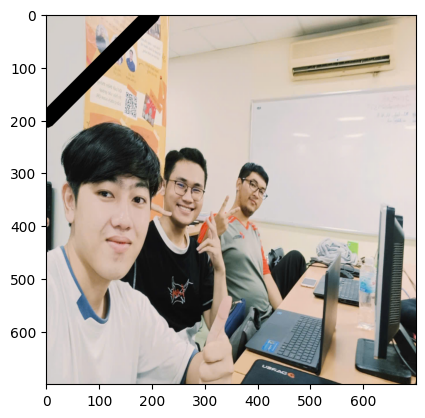

In [34]:
#5
def line_black(img, shape, line_width):
    image = cv2.line(img, (0,shape[0]-500), (shape[1]-500, 0), (0,0,0), line_width)
    return image

img = cv2.imread('xla.jpg')
img = cv2.resize(img, (700, 700))
shape = img.shape
line_width = 30
line_image = line_black(img, shape, line_width)

plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.show()

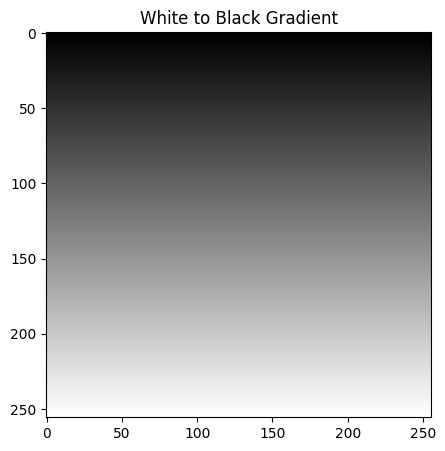

In [35]:
#6
height = 256  
width = 256  
gradient_image = np.zeros((height, width), dtype=np.uint8)

for i in range(height):
    gradient_value = int((i / height) * 255)
    gradient_image[i, :] = gradient_value
cv2.imwrite('white_black_gradient.jpg', gradient_image)
plt.figure(figsize=(5, 5))
plt.imshow(gradient_image, cmap='gray')
plt.title('White to Black Gradient')
plt.show()


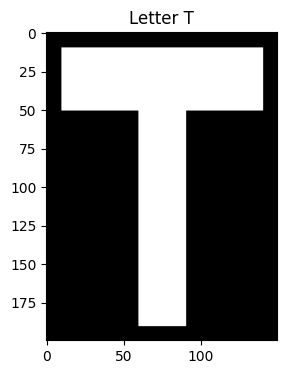

In [36]:
#7
import numpy as np
import cv2
import matplotlib.pyplot as plt

height, width = 200, 150  
image = np.zeros((height, width), dtype=np.uint8)
horizontal_thickness = 40
cv2.rectangle(image, (10, 10), (width-10, 10 + horizontal_thickness), 255, -1)
vertical_width = 30
start_x = (width - vertical_width) // 2
cv2.rectangle(image, (start_x, 10), (start_x + vertical_width, height-10), 255, -1)

plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title('Letter T')
plt.show()


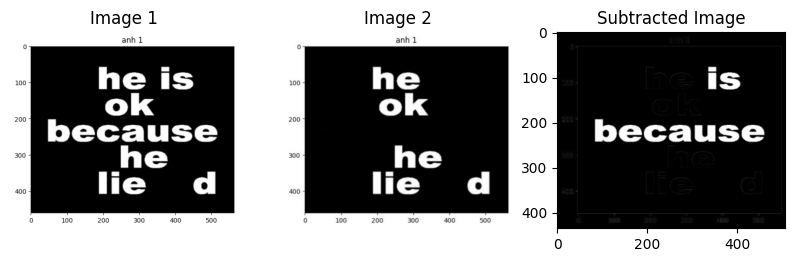

In [37]:
# resize anh
def resize_to_match(img1, img2):
    img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    return img2_resized
# subtract object from image
def secret_subtract(img1, img2):
    if img1.shape != img2.shape:
        img2 = resize_to_match(img1, img2)
    
    img1 = img1.astype(np.int32)
    img2 = img2.astype(np.int32)
    try:
        result = img1 - img2
    except Exception as e:
        print("Error during subtraction:", e)
        return None
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

img1 = cv2.imread('input1.png')
img2 = cv2.imread('input2.png')

if img1 is None or img2 is None:
    print("Error: One or both images could not be loaded.")
else:
    result = secret_subtract(img1, img2)

    if result is not None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        plt.title('Image 1')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.title('Image 2')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title('Subtracted Image')
        plt.show()
    else:
        print("Subtraction failed, no image to display.")
